In [3]:
# Log in to Plotly servers
import plotly
plotly.tools.set_credentials_file(username='wijzermans', api_key='FKGDvSah3z5WCNREBZEq')

# (*) To communicate with Plotly's server, sign in with credentials file
import plotly.plotly as py  

# (*) Useful Python/Plotly tools
import plotly.tools as tls   

# (*) Graph objects to piece together plots
from plotly.graph_objs import *

import matplotlib.pyplot as plt # (*) import matplotlib

%matplotlib inline

In [7]:
#py.iplot_mpl: similar to py.plot_mpl but for IPython notebook use. 
#It displays the returned Plotly figure directly in the IPython notebook in session.

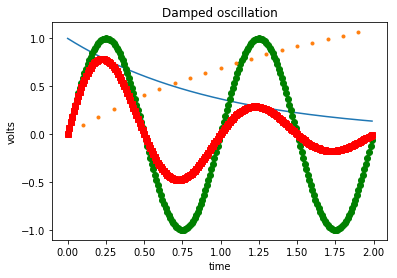

In [21]:
# Package all mpl plotting commands inside one function
def plot_mpl_fig():
    
    # Make two time arrays
    t1 = np.arange(0.0, 2.0, 0.1)
    t2 = np.arange(0.0, 2.0, 0.01)

    # N.B. .plot() returns a list of lines.  
    # The "l1, = plot" usage extracts the first element of the list 
    # into l1 using tuple unpacking.  
    # So, l1 is a Line2D instance, not a sequence of lines
    l1, = plt.plot(t2, np.exp(-t2), label='decaying exp.')
    l2, l3 = plt.plot(t2, np.sin(2 * np.pi * t2), '--go', 
                      t1, np.log(1 + t1), '.')
    l4, = plt.plot(t2, np.exp(-t2) * np.sin(2 * np.pi * t2), 'rs-.')

    # Add axis labels and title
    plt.xlabel('time')
    plt.ylabel('volts')
    plt.title('Damped oscillation')
    
    return (l1, l2, l3, l4)  # return line objects (for legend, later)

# Plot it!
plot_mpl_fig()

# N.B. get matplotlib figure object and assign a variable to it
mpl_fig1 = plt.gcf()

In [22]:
py.iplot_mpl(mpl_fig1, filename='s6_damped_oscillation')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~wijzermans/0 or inside your plot.ly account where it is named 's6_damped_oscillation'


In [23]:
import plotly.plotly as py
import plotly.figure_factory as ff

import numpy as np

# Add histogram data
x1 = np.random.randn(200)-2  
x2 = np.random.randn(200)  
x3 = np.random.randn(200)+2  
x4 = np.random.randn(200)+4  

# Group data together
hist_data = [x1, x2, x3, x4]

group_labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)

# Plot!
py.iplot(fig, filename='Distplot with Multiple Datasets')

In [24]:
import plotly.plotly as py
import plotly.figure_factory as ff

import numpy as np

x1 = np.random.randn(200) - 1 
x2 = np.random.randn(200)
x3 = np.random.randn(200) + 1 

hist_data = [x1, x2, x3]

group_labels = ['Group 1', 'Group 2', 'Group 3']
colors = ['#333F44', '#37AA9C', '#94F3E4']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)

# Add title
fig['layout'].update(title='Curve and Rug Plot')

# Plot!
py.iplot(fig, filename='Curve and Rug')

In [25]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Barpolar(
    r=[77.5, 72.5, 70.0, 45.0, 22.5, 42.5, 40.0, 62.5],
    text=['North', 'N-E', 'East', 'S-E', 'South', 'S-W', 'West', 'N-W'],
    name='11-14 m/s',
    marker=dict(
        color='rgb(106,81,163)'
    )
)
trace2 = go.Barpolar(
    r=[57.49999999999999, 50.0, 45.0, 35.0, 20.0, 22.5, 37.5, 55.00000000000001],
    text=['North', 'N-E', 'East', 'S-E', 'South', 'S-W', 'West', 'N-W'],
    name='8-11 m/s',
    marker=dict(
        color='rgb(158,154,200)'
    )
)
trace3 = go.Barpolar(
    r=[40.0, 30.0, 30.0, 35.0, 7.5, 7.5, 32.5, 40.0],
    text=['North', 'N-E', 'East', 'S-E', 'South', 'S-W', 'West', 'N-W'],
    name='5-8 m/s',
    marker=dict(
        color='rgb(203,201,226)'
    )
)
trace4 = go.Barpolar(
    r=[20.0, 7.5, 15.0, 22.5, 2.5, 2.5, 12.5, 22.5],
    text=['North', 'N-E', 'East', 'S-E', 'South', 'S-W', 'West', 'N-W'],
    name='< 5 m/s',
    marker=dict(
        color='rgb(242,240,247)'
    )
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    title='Wind Speed Distribution in Laurel, NE',
    font=dict(
        size=16
    ),
    legend=dict(
        font=dict(
            size=16
        )
    ),
    radialaxis=dict(
        ticksuffix='%'
    ),
    orientation=270
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='polar-area-chart')

In [26]:
import plotly.plotly as py
import pandas as pd

df_airports = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df_airports.head()

df_flight_paths = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_aa_flight_paths.csv')
df_flight_paths.head()

airports = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_airports['long'],
        lat = df_airports['lat'],
        hoverinfo = 'text',
        text = df_airports['airport'],
        mode = 'markers',
        marker = dict( 
            size=2, 
            color='rgb(255, 0, 0)',
            line = dict(
                width=3,
                color='rgba(68, 68, 68, 0)'
            )
        ))]
        
flight_paths = []
for i in range( len( df_flight_paths ) ):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            locationmode = 'USA-states',
            lon = [ df_flight_paths['start_lon'][i], df_flight_paths['end_lon'][i] ],
            lat = [ df_flight_paths['start_lat'][i], df_flight_paths['end_lat'][i] ],
            mode = 'lines',
            line = dict(
                width = 1,
                color = 'red',
            ),
            opacity = float(df_flight_paths['cnt'][i])/float(df_flight_paths['cnt'].max()),
        )
    )
    
layout = dict(
        title = 'Feb. 2011 American Airline flight paths<br>(Hover for airport names)',
        showlegend = False, 
        geo = dict(
            scope='north america',
            projection=dict( type='azimuthal equal area' ),
            showland = True,
            landcolor = 'rgb(243, 243, 243)',
            countrycolor = 'rgb(204, 204, 204)',
        ),
    )
    
fig = dict( data=flight_paths + airports, layout=layout )
py.iplot( fig, filename='d3-flight-paths' )

In [37]:
import plotly.plotly as py
import numpy as np

data = [dict(
        visible = False,
        line=dict(color='#00CED1', width=6),
        name = '𝜈 = '+str(step),
        x = np.arange(0,10,0.01),
        y = np.sin(step*np.arange(0,10,0.01))) for step in np.arange(0,5,0.1)]
data[10]['visible'] = True

py.iplot(data, filename='Single Sine Wave')

steps = []
for i in range(len(data)):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(data)],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = 10,
    currentvalue = {"prefix": "Frequency: "},
    pad = {"t": 50},
    steps = steps
)]

layout = dict(sliders=sliders)

fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Sine Wave Slider')

In [32]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd

# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

data = [
    go.Surface(
        z=z_data.values
    )
]
layout = go.Layout(
    title='Impact of model parameters on project NPV in USD',
    autosize=False,
    width=800,
    height=800,
    margin=dict(
        l=80,
        r=50,
        b=100,
        t=90
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='elevations-3d-surface')